<a href="https://colab.research.google.com/github/JudsonMorgan/Breast-cancer-prediction/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Necessary import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

### Load the data

In [2]:
cancer_data = pd.read_csv("/content/drive/MyDrive/Exercise/data/data (1).csv")

#view the data
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#copy the data
data = cancer_data.copy()

In [4]:
data.shape

(569, 33)

In [5]:
#drop the unnamed column
data.drop('Unnamed: 32', axis = 1, inplace=True)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#set the id column as index
data.set_index('id', inplace=True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [9]:
### Rearrange the columns
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


data = data[columns]
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [10]:
### check for missing columns
data.isna().sum().T

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

### Outlier Detection and Removal

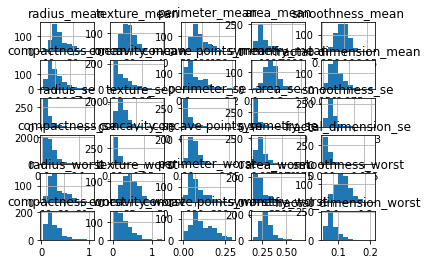

In [11]:
data.hist();

In [12]:
#statistical view of the data
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


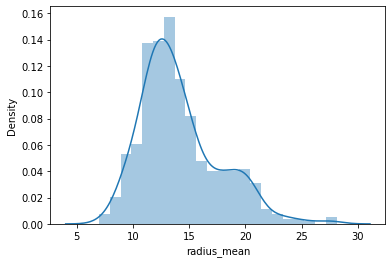

In [13]:
sns.distplot(data['radius_mean'])

In [14]:
data[data['radius_mean'] > data['radius_mean'].mean() + 3 * data['radius_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
8611555,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,M
873592,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,M
8810703,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,M
899987,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,M
911296202,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623,...,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,M


In [15]:
df_1 = data[data['radius_mean'] <= data['radius_mean'].mean() + 3 * data['radius_mean'].std()]

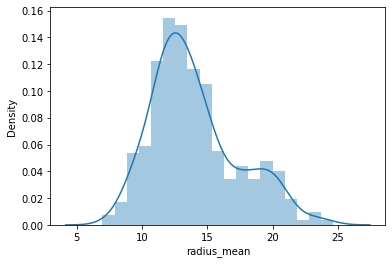

In [16]:
sns.distplot(df_1['radius_mean'])

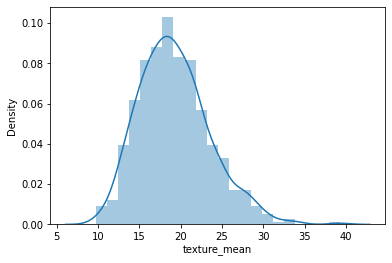

In [17]:
sns.distplot(df_1['texture_mean'])

In [18]:
df_1[df_1['texture_mean'] > df_1['texture_mean'].mean() + 3 * df_1['texture_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
88119002,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,M
88203002,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,B
88330202,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,0.1809,0.05966,...,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496,M
88725602,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,...,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040,M


In [19]:
df_2 = df_1[df_1['texture_mean'] <= df_1['texture_mean'].mean() + 3 * df_1['texture_mean'].std()]

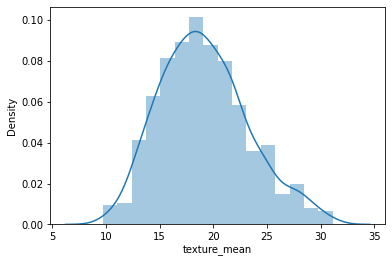

In [20]:
sns.distplot(df_2['texture_mean'])

In [21]:
df_2[df_2['perimeter_mean'] > df_2['perimeter_mean'].mean() + 3 * df_2['perimeter_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
865423,24.25,20.2,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,M
91762702,24.63,21.6,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,0.1991,0.06739,...,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671,M


In [22]:
df_3 = df_2[df_2['perimeter_mean'] <= df_2['perimeter_mean'].mean() + 3 * df_2['perimeter_mean'].std()]

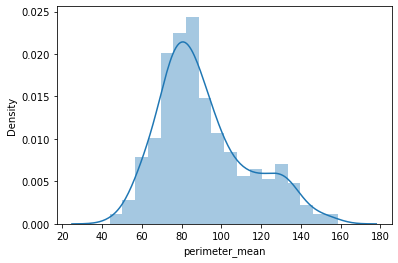

In [23]:
sns.distplot(df_3['perimeter_mean'])

In [24]:
df_3[df_3['area_mean'] > df_3['area_mean'].mean() + 3 * df_3['area_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
8712289,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,M
878796,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,M
88299702,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,M
89812,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,M
915143,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.10030,0.1505,0.05484,...,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277,M


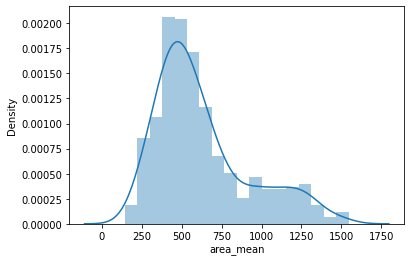

In [25]:
df_4 = df_3[df_3['area_mean'] <= df_3['area_mean'].mean() + 3 * df_3['area_mean'].std()]
sns.distplot(df_4['area_mean'])

In [26]:
df_4[df_4['smoothness_mean'] > df_4['smoothness_mean'].mean() + 3 * df_4['smoothness_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
84348301,11.420,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,M
863030,13.110,15.56,87.21,530.2,0.1398,0.1765,0.2071,0.09601,0.1925,0.07692,...,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.1986,0.3147,0.1405,M
915186,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,0.09502,...,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.1252,B


In [27]:
df_5 = df_4[df_4['smoothness_mean'] <= df_4['smoothness_mean'].mean() + 3 * df_4['smoothness_mean'].std()]

In [28]:
df_5[df_5['compactness_mean'] > df_5['compactness_mean'].mean() + 3 * df_5['compactness_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
8610862,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,0.08142,...,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964,M
86355,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,M
873593,21.09,26.57,142.7,1311.0,0.1141,0.2832,0.2487,0.1496,0.2395,0.07398,...,33.48,176.5,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840,M
887181,15.66,23.20,110.2,773.5,0.1109,0.3114,0.3176,0.1377,0.2495,0.08104,...,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190,M
90439701,17.91,21.02,124.4,994.0,0.1230,0.2576,0.3189,0.1198,0.2113,0.07115,...,27.78,149.6,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980,M
927241,20.60,29.33,140.1,1265.0,0.1178,0.2770,0.3514,0.1520,0.2397,0.07016,...,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,M


In [29]:
df_6 = df_5[df_5['compactness_mean'] <= df_5['compactness_mean'].mean() + 3 * df_5['compactness_mean'].std()]

In [30]:
df_6[df_6['concavity_mean'] > df_6['concavity_mean'].mean() + 3 * df_6['concavity_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
859471,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750,B
86409,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,...,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820,B
8710441,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590,B
899667,15.750,19.22,107.10,758.6,0.12430,0.2364,0.2914,0.12420,0.2375,0.07603,...,24.17,119.40,915.3,0.15500,0.5046,0.6872,0.2135,0.4245,0.10500,M
926125,20.920,25.09,143.00,1347.0,0.10990,0.2236,0.3174,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.4186,0.6599,0.2542,0.2929,0.09873,M


In [31]:
df_7 = df_6[df_6['concavity_mean'] <= df_6['concavity_mean'].mean() + 3 * df_6['concavity_mean'].std()]

In [32]:
df_7[df_7['concave points_mean'] > df_7['concave points_mean'].mean() + 3 * df_7['concave points_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
8611792,19.10,26.29,129.1,1132.0,0.1215,0.1791,0.1937,0.1469,0.1634,0.07224,...,32.72,141.3,1298.0,0.1392,0.2817,0.2432,0.1841,0.2311,0.09203,M
895100,20.34,21.51,135.9,1264.0,0.1170,0.1875,0.2565,0.1504,0.2569,0.06670,...,31.86,171.1,1938.0,0.1592,0.4492,0.5344,0.2685,0.5558,0.10240,M
9012000,22.01,21.90,147.2,1482.0,0.1063,0.1954,0.2448,0.1501,0.1824,0.06140,...,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,M
903516,21.61,22.28,144.4,1407.0,0.1167,0.2087,0.2810,0.1562,0.2162,0.06606,...,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070,M


In [33]:
df_8 = df_7[df_7['concave points_mean'] <= df_7['concave points_mean'].mean() + 3 * df_7['concave points_mean'].std()]

In [34]:
df_8[df_8['symmetry_mean'] > df_8['symmetry_mean'].mean() + 3 * df_8['symmetry_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
852631,17.14,16.40,116.00,912.7,0.1186,0.22760,0.22290,0.14010,0.3040,0.07413,...,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590,M
858970,10.17,14.88,64.55,311.9,0.1134,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020,B
869691,11.80,16.58,78.99,432.0,0.1091,0.17000,0.16590,0.07415,0.2678,0.07371,...,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300,M
8913049,11.26,19.96,73.72,394.1,0.0802,0.11810,0.09274,0.05588,0.2595,0.06233,...,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,B


In [35]:
df_9 = df_8[df_8['symmetry_mean'] <= df_8['symmetry_mean'].mean() + 3 * df_8['symmetry_mean'].std()]

In [36]:
df_9[df_9['fractal_dimension_mean'] > df_9['fractal_dimension_mean'].mean() + 3 * df_9['fractal_dimension_mean'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
84501001,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.2075,M
859711,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084,B
871001502,8.219,20.70,53.27,203.9,0.09405,0.1305,0.13210,0.02168,0.2222,0.08261,...,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.1486,B
894329,9.042,18.90,60.07,244.5,0.09968,0.1972,0.19750,0.04908,0.2330,0.08743,...,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.1055,B
901315,10.570,20.22,70.15,338.3,0.09073,0.1660,0.22800,0.05941,0.2188,0.08450,...,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.1200,B
915276,9.676,13.14,64.12,272.5,0.12550,0.2204,0.11880,0.07038,0.2057,0.09575,...,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.1364,B


In [37]:
df_10 = df_9[df_9['fractal_dimension_mean'] <= df_9['fractal_dimension_mean'].mean() + 3 * df_9['fractal_dimension_mean'].std()]

In [38]:
df_10.columns.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis'], dtype=object)

In [39]:
df_10[df_10['radius_se'] > df_10['radius_se'].mean() + 3 * df_10['radius_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
855133,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,M
868826,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,...,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147,M
8712766,17.47,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,0.06365,...,32.33,155.30,1660.0,0.13760,0.38300,0.48900,0.17210,0.2160,0.09300,M
88995002,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218,M
8910988,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410,0.2833,0.08858,M
892438,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929,M
89263202,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469,M
9011971,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.11680,0.08465,0.1717,0.05054,...,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494,M
90602302,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,0.06864,...,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480,M


In [40]:
df_11 = df_10[df_10['radius_se'] <= df_10['radius_se'].mean() + 3 * df_10['radius_se'].std()]

In [41]:
df_11[df_11['texture_se'] > df_11['texture_se'].mean() + 3 * df_11['texture_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
846226,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,M
875099,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,B
905978,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,0.06601,...,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304,B
9113846,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743,B
925236,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,B
925291,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,B
925311,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,B


In [42]:
df_12 = df_11[df_11['texture_se'] <= df_11['texture_se'].mean() + 3 * df_11['texture_se'].std()]

In [43]:
df_12[df_12['perimeter_se'] > df_12['perimeter_se'].mean() + 3 * df_12['perimeter_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
855625,19.07,24.81,128.3,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,0.06343,...,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,M
8711803,19.19,15.94,126.3,1157.0,0.08694,0.1185,0.1193,0.09667,0.1741,0.05176,...,17.81,146.6,1495.0,0.1124,0.2016,0.2264,0.1777,0.2443,0.06251,M
881046502,20.58,22.14,134.7,1290.0,0.09090,0.1348,0.1640,0.09561,0.1765,0.05024,...,27.84,158.3,1656.0,0.1178,0.2920,0.3861,0.1920,0.2909,0.05865,M
8811842,19.80,21.56,129.7,1230.0,0.09383,0.1306,0.1272,0.08691,0.2094,0.05581,...,28.64,170.3,2009.0,0.1353,0.3235,0.3617,0.1820,0.3070,0.08255,M
884948,20.94,23.56,138.9,1364.0,0.10070,0.1606,0.2712,0.13100,0.2205,0.05898,...,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849,M
88649001,19.55,28.77,133.6,1207.0,0.09260,0.2063,0.1784,0.11440,0.1893,0.06232,...,36.27,178.6,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050,M
9011494,20.20,26.83,133.7,1234.0,0.09905,0.1669,0.1641,0.12650,0.1875,0.06020,...,33.81,160.0,1671.0,0.1278,0.3416,0.3703,0.2152,0.3271,0.07632,M


In [44]:
df_13 = df_12[df_12['perimeter_se'] <= df_12['perimeter_se'].mean() + 3 * df_12['perimeter_se'].std()]

In [45]:
df_13[df_13['area_se'] > df_13['area_se'].mean() + 3 * df_13['area_se'].std()]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
849014,19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,M
852552,16.65,21.38,110.0,904.6,0.11210,0.1457,0.1525,0.09170,0.1995,0.06330,...,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564,M
853401,18.63,25.11,124.8,1088.0,0.10640,0.1887,0.2319,0.12440,0.2183,0.06197,...,34.01,160.5,1670.0,0.1491,0.4257,0.6133,0.1848,0.3444,0.09782,M
857637,19.21,18.57,125.5,1152.0,0.10530,0.1267,0.1323,0.08994,0.1917,0.05961,...,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,M
8610637,18.05,16.15,120.2,1006.0,0.10650,0.2146,0.1684,0.10800,0.2152,0.06673,...,18.91,150.1,1610.0,0.1478,0.5634,0.3786,0.2102,0.3751,0.11080,M
908445,18.82,21.97,123.7,1110.0,0.10180,0.1389,0.1594,0.08744,0.1943,0.06132,...,30.93,145.3,1603.0,0.1390,0.3463,0.3912,0.1708,0.3007,0.08314,M
911296201,17.08,27.15,111.2,930.9,0.09898,0.1110,0.1007,0.06431,0.1793,0.06281,...,34.49,152.1,1648.0,0.1600,0.2444,0.2639,0.1555,0.3010,0.09060,M
9113538,17.60,23.33,119.0,980.5,0.09289,0.2004,0.2136,0.10020,0.1696,0.07369,...,28.87,143.6,1437.0,0.1207,0.4785,0.5165,0.1996,0.2301,0.12240,M
91930402,20.47,20.67,134.7,1299.0,0.09156,0.1313,0.1523,0.10150,0.2166,0.05419,...,27.15,152.0,1645.0,0.1097,0.2534,0.3092,0.1613,0.3220,0.06386,M


In [46]:
df_14 = df_13[df_13['area_se'] <= df_13['area_se'].mean() + 3 * df_13['area_se'].std()]

In [47]:
df_14[df_14['smoothness_se'] > df_14['smoothness_se'].mean() + 3 * df_14['smoothness_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
864726,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722,B
881094802,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818,M
884437,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,29.46,73.68,402.8,0.1515,0.10260,0.11810,0.06736,0.2883,0.07748,B
894047,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,B
898677,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488,B
903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,0.1460,0.13100,0.00000,0.00000,0.2445,0.08865,B


In [48]:
df_15 = df_14[df_14['smoothness_se'] <= df_14['smoothness_se'].mean() + 3 * df_14['smoothness_se'].std()]

In [49]:
df_15[df_15['compactness_se'] > df_15['compactness_se'].mean() + 3 * df_15['compactness_se'].std()]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
858986,14.250,22.15,96.42,645.7,0.10490,0.2008,0.2135,0.08653,0.1949,0.07292,...,29.51,119.10,959.5,0.16400,0.6247,0.6922,0.17850,0.2844,0.11320,M
872608,9.904,18.06,64.60,302.4,0.09699,0.1294,0.1307,0.03716,0.1669,0.08116,...,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620,B
874858,14.220,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,0.2384,0.07542,...,37.18,106.40,762.4,0.15330,0.9327,0.8488,0.17720,0.5166,0.14460,M
89143602,14.410,19.73,96.03,651.0,0.08757,0.1676,0.1362,0.06602,0.1714,0.07192,...,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799,B
903011,11.270,15.50,73.38,392.0,0.08365,0.1114,0.1007,0.02757,0.1810,0.07252,...,18.93,79.73,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430,B
9113239,13.240,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,0.06432,...,25.50,115.00,733.5,0.12010,0.5646,0.6556,0.13570,0.2845,0.12490,B
913063,12.450,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,0.07325,...,21.03,97.82,580.6,0.11750,0.4061,0.4896,0.13420,0.3231,0.10340,B


In [50]:
df_16 = df_15[df_15['compactness_se'] <= df_15['compactness_se'].mean() + 3 * df_15['compactness_se'].std()]

In [51]:
df_16[df_16['concavity_se'] > df_16['concavity_se'].mean() + 3 * df_16['concavity_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
883852,11.300,18.19,73.93,389.4,0.09592,0.1325,0.15480,0.02854,0.2054,0.07669,...,27.96,87.16,472.9,0.13470,0.4848,0.7436,0.1218,0.3308,0.12970,B
884626,12.890,14.11,84.95,512.2,0.08760,0.1346,0.13740,0.03980,0.1596,0.06409,...,17.70,105.00,639.1,0.12540,0.5849,0.7727,0.1561,0.2639,0.11780,B
8912284,12.890,15.70,84.08,516.6,0.07818,0.0958,0.11150,0.03390,0.1432,0.05935,...,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.1017,0.1999,0.07127,B
907914,14.900,22.53,102.10,685.0,0.09947,0.2225,0.27330,0.09711,0.2041,0.06898,...,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.2475,0.2866,0.11550,M
911916,16.250,19.51,109.80,815.8,0.10260,0.1893,0.22360,0.09194,0.2151,0.06578,...,23.05,122.10,939.7,0.13770,0.4462,0.5897,0.1775,0.3318,0.09136,M
921362,7.691,25.44,48.34,170.4,0.08668,0.1199,0.09252,0.01364,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.3064,0.3393,0.0500,0.2790,0.10660,B


In [52]:
df_17 = df_16[df_16['concavity_se'] <= df_16['concavity_se'].mean() + 3 * df_16['concavity_se'].std()]

In [53]:
df_17[df_17['concave points_se'] > df_17['concave points_se'].mean() + 3 * df_17['concave points_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
90312,19.55,23.21,128.90,1174.0,0.1010,0.13180,0.1856,0.10210,0.1989,0.05884,...,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602,M
918192,13.94,13.17,90.31,594.2,0.1248,0.09755,0.1010,0.06615,0.1976,0.06457,...,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.1015,0.2160,0.07253,B


In [54]:
df_18 = df_17[df_17['concave points_se'] <= df_17['concave points_se'].mean() + 3 * df_17['concave points_se'].std()]

In [55]:
df_18[df_18['symmetry_se'] > df_18['symmetry_se'].mean() + 3 * df_18['symmetry_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,B
865128,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,...,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111,M
8810955,14.190,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.064620,0.2235,0.06433,...,34.85,115.00,811.3,0.15590,0.40590,0.37440,0.17720,0.4724,0.10260,M
895633,16.260,21.88,107.50,826.8,0.11650,0.12830,0.179900,0.079810,0.1869,0.06532,...,25.21,113.70,975.2,0.14260,0.21160,0.33440,0.10470,0.2736,0.07953,M
897132,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522,B
917092,9.295,13.90,59.96,257.8,0.13710,0.12250,0.033320,0.024210,0.2197,0.07696,...,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982,B


In [56]:
df_19 = df_18[df_18['symmetry_se'] <= df_18['symmetry_se'].mean() + 3 * df_18['symmetry_se'].std()]

In [57]:
df_19[df_19['fractal_dimension_se'] > df_19['fractal_dimension_se'].mean() + 3 * df_19['fractal_dimension_se'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
84667401,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.16510,0.7725,0.6943,0.22080,0.3596,0.14310,M
869476,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,0.07839,...,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360,B
86973701,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218,B
886776,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,0.07596,...,22.66,119.80,928.8,0.17650,0.4503,0.4429,0.22290,0.3258,0.11910,M
8912909,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,...,27.29,92.20,546.1,0.11160,0.2813,0.2365,0.11550,0.2465,0.09981,B
905190,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151,B
9111596,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,B
91544002,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,...,20.74,76.08,411.1,0.16620,0.2031,0.1256,0.09514,0.2780,0.11680,B


In [58]:
df_20 = df_19[df_19['fractal_dimension_se'] <= df_19['fractal_dimension_se'].mean() + 3 * df_19['fractal_dimension_se'].std()]

In [59]:
df_20[df_20['radius_worst'] > df_20['radius_worst'].mean() + 3 * df_20['radius_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
851509,21.16,23.04,137.2,1404.0,0.09428,0.1022,0.1097,0.08632,0.1769,0.05278,...,35.59,188.0,2615.0,0.1401,0.26,0.3155,0.2009,0.2822,0.07526,M


In [60]:
df_21 = df_20[df_20['radius_worst'] <= df_20['radius_worst'].mean() + 3 * df_20['radius_worst'].std()]

In [61]:
df_21[df_21['texture_worst'] > df_21['texture_worst'].mean() + 3 * df_21['texture_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
925622,15.22,30.62,103.4,716.9,0.1048,0.2087,0.255,0.09429,0.2128,0.07152,...,42.79,128.7,915.0,0.1417,0.7917,1.17,0.2356,0.4089,0.1409,M


In [62]:
df_22 = df_21[df_21['texture_worst'] <= df_21['texture_worst'].mean() + 3 * df_21['texture_worst'].std()]

In [63]:

df_22[df_22['perimeter_worst'] > df_22['perimeter_worst'].mean() + 3 * df_22['perimeter_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,


In [64]:
df_22[df_22['area_worst'] > df_22['area_worst'].mean() + 3 * df_22['area_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
871201,19.59,18.15,130.7,1214.0,0.11200,0.1666,0.2508,0.12860,0.2027,0.06082,...,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223,M
886226,19.45,19.33,126.5,1169.0,0.10350,0.1188,0.1379,0.08591,0.1776,0.05647,...,24.57,163.1,1972.0,0.1497,0.3161,0.4317,0.1999,0.3379,0.08950,M
911157302,21.10,20.52,138.1,1384.0,0.09684,0.1175,0.1572,0.11550,0.1554,0.05661,...,32.07,168.2,2022.0,0.1368,0.3101,0.4399,0.2280,0.2268,0.07425,M


In [65]:
df_23 = df_22[df_22['area_worst'] <= df_22['area_worst'].mean() + 3 * df_22['area_worst'].std()]

In [66]:
df_23[df_23['smoothness_worst'] > df_23['smoothness_worst'].mean() + 3 * df_23['smoothness_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
87880,13.81,23.75,91.56,597.8,0.1323,0.1768,0.1558,0.09176,0.2251,0.07421,...,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.1086,M
9013838,11.08,18.83,73.30,361.6,0.1216,0.2154,0.1689,0.06367,0.2196,0.07950,...,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403,M


In [67]:
df_24 = df_23[df_23['smoothness_worst'] <= df_23['smoothness_worst'].mean() + 3 * df_23['smoothness_worst'].std()]

In [68]:
df_24[df_24['compactness_worst'] > df_24['compactness_worst'].mean() + 3 * df_24['compactness_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
84799002,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,M
8511133,15.34,14.26,102.50,704.4,0.10730,0.2135,0.2077,0.09756,0.2521,0.07032,...,19.08,125.1,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946,M
852763,14.58,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,0.06924,...,33.21,122.4,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.12750,M
852973,15.30,25.27,102.40,732.4,0.10820,0.1697,0.1683,0.08751,0.1926,0.06540,...,36.71,149.3,1269.0,0.1641,0.6110,0.6335,0.2024,0.4027,0.09876,M
854002,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,0.06261,...,30.90,161.4,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230,M
859717,17.20,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,0.06487,...,33.82,151.6,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390,M
885429,19.73,19.82,130.70,1206.0,0.10620,0.1849,0.2417,0.09740,0.1733,0.06697,...,25.59,159.8,1933.0,0.1710,0.5955,0.8489,0.2507,0.2749,0.12970,M


In [69]:
df_25 = df_24[df_24['compactness_worst'] <= df_24['compactness_worst'].mean() + 3 * df_24['compactness_worst'].std()]

In [70]:
df_25[df_25['concavity_worst'] > df_25['concavity_worst'].mean() + 3 * df_25['concavity_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
853612,11.84,18.70,77.93,440.6,0.11090,0.1516,0.1218,0.05182,0.2301,0.07799,...,28.12,119.4,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.14020,M
857010,18.65,17.60,123.70,1076.0,0.10990,0.1686,0.1974,0.10090,0.1907,0.06049,...,21.32,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,M
864877,15.78,22.91,105.70,782.6,0.11550,0.1752,0.2133,0.09479,0.2096,0.07331,...,30.50,130.3,1272.0,0.1855,0.4925,0.7356,0.2034,0.3274,0.12520,M
9012315,16.35,23.29,109.00,840.4,0.09742,0.1497,0.1811,0.08773,0.2175,0.06218,...,31.03,129.3,1165.0,0.1415,0.4665,0.7087,0.2248,0.4824,0.09614,M


In [71]:
df_26 = df_25[df_25['concavity_worst'] <= df_25['concavity_worst'].mean() + 3 * df_25['concavity_worst'].std()]

In [72]:
df_26[df_26['concave points_worst'] > df_26['concave points_worst'].mean() + 3 * df_26['concave points_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,


In [73]:
df_26[df_26['symmetry_worst'] > df_26['symmetry_worst'].mean() + 3 * df_26['symmetry_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,M
854039,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,27.26,132.7,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330,M
854253,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,29.02,133.5,1229.0,0.1563,0.3835,0.5409,0.18130,0.4863,0.08633,M
877500,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,30.12,117.9,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130,M
913535,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,...,26.56,127.3,1084.0,0.1009,0.2920,0.2477,0.08737,0.4677,0.07623,M


In [74]:
df_27 = df_26[df_26['symmetry_worst'] <= df_26['symmetry_worst'].mean() + 3 * df_26['symmetry_worst'].std()]

In [75]:
df_27[df_27['fractal_dimension_worst'] > df_27['fractal_dimension_worst'].mean() + 3 * df_27['fractal_dimension_worst'].std()]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
843786,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,M
85715,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.07340,0.2128,0.06777,...,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.1179,M
875263,12.34,26.86,81.15,477.4,0.1034,0.1353,0.1085,0.04562,0.1943,0.06937,...,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.1205,M
881861,12.83,22.33,85.26,503.2,0.1088,0.1799,0.1695,0.06861,0.2123,0.07254,...,30.15,105.3,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.1243,M
91504,13.82,24.49,92.33,595.9,0.1162,0.1681,0.1357,0.06759,0.2275,0.07237,...,32.94,106.0,788.0,0.1794,0.3966,0.3381,0.1521,0.3651,0.1183,M


In [76]:
df_28 = df_27[df_27['fractal_dimension_worst'] <= df_27['fractal_dimension_worst'].mean() + 3 * df_27['fractal_dimension_worst'].std()]

In [77]:
data_without_outliers = df_28.copy()

In [78]:
data_without_outliers.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,13.506364,18.608668,87.270864,585.989953,0.093844,0.086709,0.061963,0.037716,0.174943,0.061218,...,15.263229,24.821285,99.712967,751.874533,0.128885,0.206835,0.208637,0.097144,0.278065,0.079009
std,2.757044,3.932044,18.698138,251.836931,0.012391,0.034830,0.050802,0.027864,0.021873,0.005048,...,3.576594,5.651819,24.319288,372.357666,0.019909,0.102094,0.141556,0.051682,0.042887,0.011720
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.171200,0.055210
25%,11.655000,15.790000,74.710000,415.925000,0.084762,0.059658,0.025558,0.018625,0.159375,0.057260,...,12.952500,20.537500,83.685000,512.950000,0.114275,0.134600,0.096765,0.061218,0.247250,0.070225
50%,13.020000,18.265000,84.065000,520.100000,0.093280,0.079500,0.045580,0.028640,0.173500,0.060815,...,14.375000,24.670000,93.805000,630.050000,0.128900,0.187950,0.180700,0.085270,0.274850,0.077685
75%,14.822500,20.985000,96.145000,674.575000,0.102250,0.109925,0.086938,0.053683,0.189350,0.064145,...,16.762500,28.460000,112.000000,861.625000,0.141825,0.263400,0.306700,0.133600,0.306350,0.085500
max,21.370000,30.720000,141.300000,1386.000000,0.129100,0.202200,0.254500,0.132200,0.254000,0.078180,...,25.370000,41.610000,166.800000,1956.000000,0.190900,0.560900,0.639900,0.254300,0.412800,0.115100


#### Target Encoding

In [79]:
data_without_outliers['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [80]:
data_without_outliers['diagnosis'].value_counts(normalize=True)

B    0.735981
M    0.264019
Name: diagnosis, dtype: float64

In [81]:
data_without_outliers['diagnosis'] = data_without_outliers['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
data_without_outliers['diagnosis'].unique()


array([1, 0])

In [82]:
data_without_outliers.rename(columns = {'diagnosis': 'Target'}, inplace=True)
data_without_outliers.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
id,,,,,,,,,,,,,,,,,,,,,
842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84358402,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
844359,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
84458202,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1


### Ensemble classifier

In [83]:
data = data_without_outliers.copy()

#view the data
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
id,,,,,,,,,,,,,,,,,,,,,
842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84358402,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
844359,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
84458202,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1


In [84]:
#split the data into features and label
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [85]:
#feature scaling
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_scaled

array([[ 2.56503078, -0.21354025,  2.44315958, ...,  1.72131365,
        -0.07154344,  0.85517085],
       [ 2.24547479,  0.67253133,  2.28788242, ...,  2.82551195,
         1.94306134,  0.73216133],
       [ 2.46335388, -1.08688093,  2.56095605, ...,  1.26607401,
        -0.9726297 , -0.19041009],
       ...,
       [ 2.40525279,  2.45485924,  2.35213504, ...,  1.27188558,
        -0.48707026, -1.07966642],
       [ 1.12339748,  2.41157413,  1.12598087, ...,  0.86507568,
        -1.31345507, -0.06910903],
       [-2.08668776,  1.51022545, -2.10699678, ..., -1.88185972,
         0.21092143, -0.73626484]])

In [86]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

>DTC -0.077 (0.042)
>KNN -0.061 (0.032)
>MLP -0.067 (0.041)
>SVM -0.077 (0.036)
>GNB -0.053 (0.032)


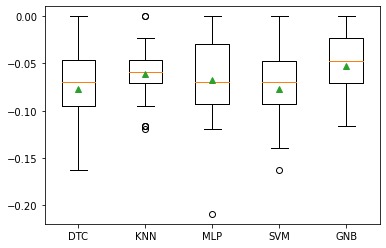

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

def get_voting():
  #define the base models 
  models = list()
  models.append(('DTC', DecisionTreeClassifier()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('GNB', GaussianNB()))
  models.append(('MLP', MLPClassifier()))
  models.append(('SVM', LinearSVC()))

  ensemble = VotingClassifier(estimators = models, voting = 'hard')
  return ensemble

#get a list of models to evaluate
def get_models():
  models = dict()
  models['DTC'] = DecisionTreeClassifier()
  models['KNN'] = KNeighborsClassifier()
  models['MLP'] = MLPClassifier()
  models['SVM'] = LinearSVC()
  models['GNB'] = GaussianNB()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

 return scores, accuracy_score

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)

 print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()